# Data Analisys
Here you can find all steps of data analisys.

In [29]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

Firts of all load aquired results

In [30]:
dp_results = pd.read_csv('./results/results_dp.csv')
aco_results = pd.read_csv('./results/results_aco.csv')
ga_results = pd.read_csv('./results/results_ga.csv')

Now we can preview our data

In [31]:
print(dp_results.head(5))

   Graph Size  Execution Time (s)  Iterations  Memory (bytes)  \
0           3               1.150           5             480   
1           4               1.105          16             960   
2           5               1.099          53            3496   
3           6               1.104         166            6728   
4           7               1.100         487           27400   

                          Shortest Path  Path Length (m)  
0                      0 -> 1 -> 2 -> 0          1153.74  
1                 0 -> 1 -> 2 -> 3 -> 0          1218.56  
2            0 -> 1 -> 2 -> 3 -> 4 -> 0          1289.25  
3       0 -> 4 -> 3 -> 2 -> 1 -> 5 -> 0          1466.98  
4  0 -> 1 -> 2 -> 3 -> 4 -> 6 -> 5 -> 0          1499.68  


In [32]:
aco_results.head(5)

,Graph Size,Execution Time (s),Iterations,Memory (bytes),Shortest Path,Path Length (m)
0,3,3.990,500,1197.148438,0 -> 2 -> 1 -> 0,1153.74
1,4,2.943,500,423.199219,0 -> 3 -> 2 -> 1 -> 0,1218.56
2,5,3.097,500,423.082031,0 -> 1 -> 2 -> 3 -> 4 -> 0,1289.25
3,6,3.418,500,562.621094,0 -> 5 -> 1 -> 2 -> 3 -> 4 -> 0,1466.98
4,7,3.640,500,632.234375,0 -> 1 -> 2 -> 3 -> 4 -> 6 -> 5 -> 0,1499.68


In [33]:
ga_results.head(5)

,Graph Size,Execution Time (s),Iterations,Memory (bytes),Shortest Path,Path Length (m)
0,3,4.446,501,23702,0 -> 1 -> 2 -> 0,1153.74
1,4,4.620,501,25294,0 -> 3 -> 2 -> 1 -> 0,1218.56
2,5,4.869,501,26518,0 -> 1 -> 2 -> 3 -> 4 -> 0,1289.25
3,6,4.999,501,28118,0 -> 4 -> 3 -> 2 -> 1 -> 5 -> 0,1466.98
4,7,5.143,501,29678,0 -> 5 -> 6 -> 4 -> 3 -> 2 -> 1 -> 0,1499.68


Firs of all analyse DP solution as perfect (Since it is guarantied that path will be the shortest)

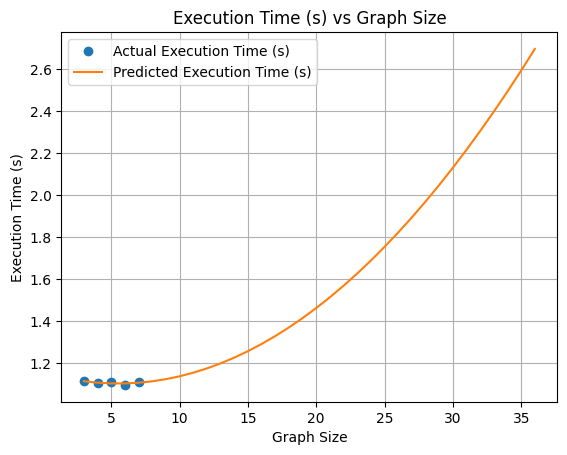

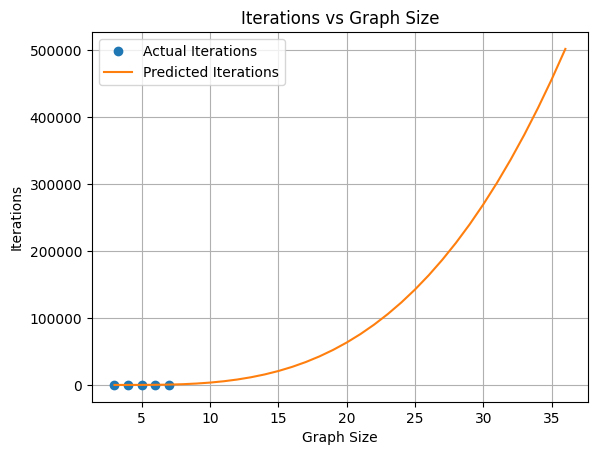

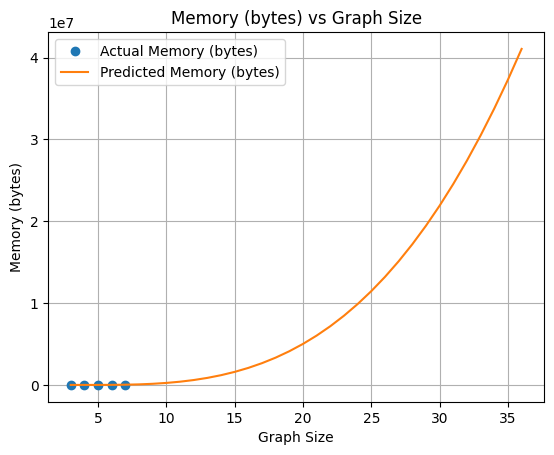

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Prediction range
x = dp_results['Graph Size'].values.reshape(-1, 1)
x_pred = np.arange(3, 37).reshape(-1, 1)

# Function to plot and predict
def plot_and_predict(y_column, degree=2):
    y = dp_results[y_column].values
    poly = PolynomialFeatures(degree)
    X_poly = poly.fit_transform(x)
    model = LinearRegression().fit(X_poly, y)

    X_pred_poly = poly.transform(x_pred)
    y_pred = model.predict(X_pred_poly)

    plt.plot(dp_results['Graph Size'], y, 'o', label=f'Actual {y_column}')
    plt.plot(x_pred.flatten(), y_pred, '-', label=f'Predicted {y_column}')
    plt.xlabel('Graph Size')
    plt.ylabel(y_column)
    plt.title(f'{y_column} vs Graph Size')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot for each metric
plot_and_predict('Execution Time (s)', degree=2)
plot_and_predict('Iterations', degree=3)
plot_and_predict('Memory (bytes)', degree=3)


We can see that with increasing size of graph complexity groth exponentially

Now we can take a look at genetic algorithms